In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cust_data =pd.read_csv('/content/Mall_Customers.csv')
cust_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Customer Gender')

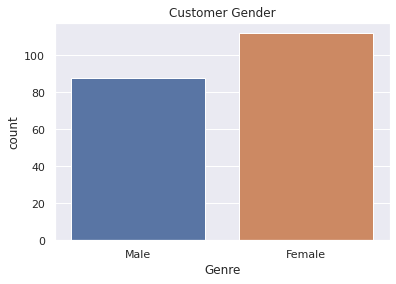

In [19]:
sns.countplot(x='Genre', data=cust_data)
plt.title('Customer Gender')

In [4]:
cust_data.shape

(200, 5)

In [5]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [31]:
cust_data.drop(['Genre'], axis=1, inplace=True)
cust_data.drop(['Age'], axis=1, inplace=True)

In [32]:
# checking for missing values
cust_data.isnull().sum()

CustomerID                0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

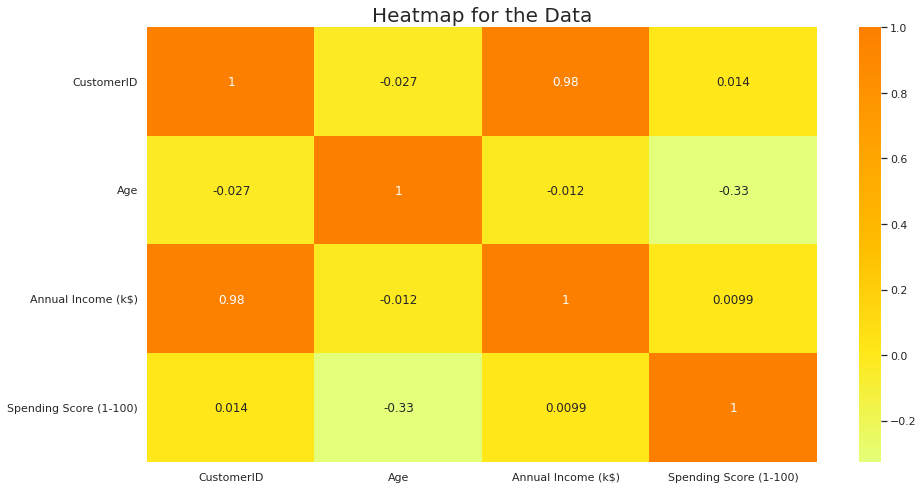

In [21]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(cust_data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

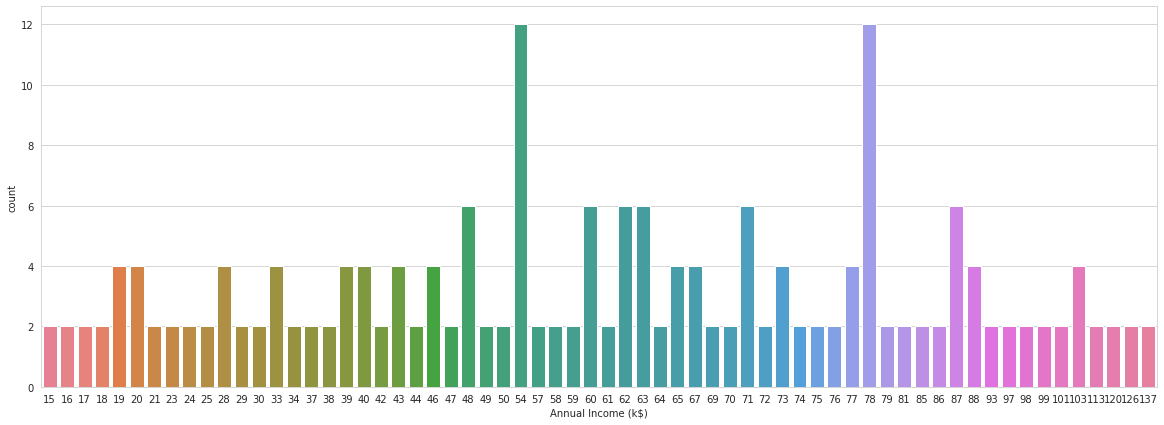

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 7))
sns.countplot(x="Annual Income (k$)", data=cust_data, palette='husl')
plt.show()

In [8]:
X=cust_data.iloc[:,[3,4]].values

K-Means Clustering

In [10]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

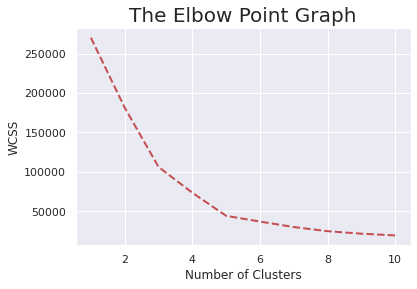

In [11]:
sns.set()
plt.plot(range(1,11), wcss,color='r',linestyle='--',linewidth=2)
plt.title('The Elbow Point Graph',fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


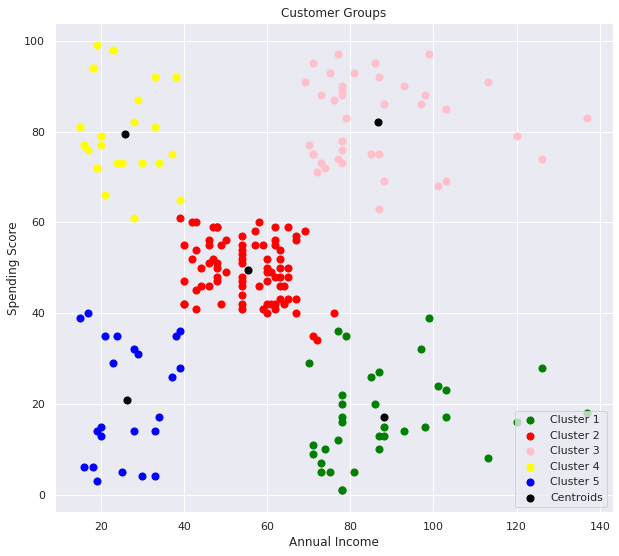

In [13]:
plt.figure(figsize=(10,9))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='pink', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='yellow', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(loc = 4)
plt.show()

In [45]:
from sklearn import metrics
score = metrics.silhouette_score(cust_data, Y)

print("Score = ", score)

Score =  0.488577513553182


Hierarchial Clustering

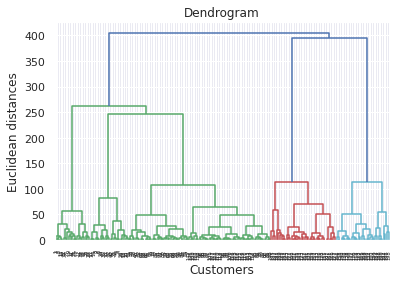

In [15]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

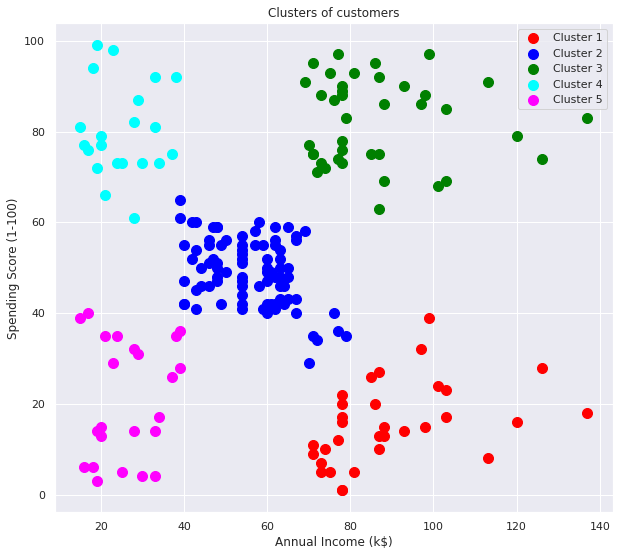

In [18]:
plt.figure(figsize=(10,9))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [44]:
score = metrics.silhouette_score(cust_data, y_hc )

print("Score = ", score)

Score =  0.4746194694084842


Affinity Propogation

In [38]:
from numpy import unique
from sklearn.cluster import AffinityPropagation
model_aff = AffinityPropagation(damping=0.9)
model_aff.fit(cust_data)
#
yhat_aff = model_aff.predict(cust_data)
clusters_aff = unique(yhat_aff)
print("Clusters of Affinity Prop.",clusters_aff)
labels_aff = model_aff.labels_
centroids_aff = model_aff.cluster_centers_

Clusters of Affinity Prop. [0 1 2 3 4 5 6 7 8]


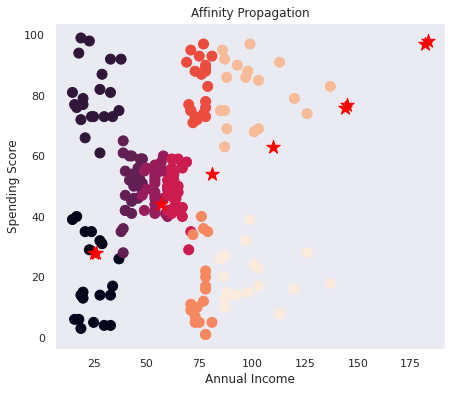

In [41]:
plt.figure(figsize=(7, 6))

plt.scatter(cust_data['Annual Income (k$)'], 
            cust_data['Spending Score (1-100)'], 
            c=labels_aff, s=100)

plt.scatter(centroids_aff[:,0], centroids_aff[:,1], color='red', marker='*', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Affinity Propagation')
plt.grid()
plt.show()

In [43]:
score_aff = metrics.silhouette_score(cust_data,labels_aff)

print("Score of Affinity Propagation = ", score_aff)

Score of Affinity Propagation =  0.4542059846314936
